# Project 2: Investigate Medical Appointment No-Shows Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data used in this project is a No-show appointments dataset from Kaggle. This dataset collects information
from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. <br>
A number of characteristics about the patient are included in each row such as: <br>
● ‘ScheduledDay’ tells us on what day the patient set up their appointment. <br>
● ‘Neighborhood’ indicates the location of the hospital. <br>
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. <br>
● The no-show column (last column): it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. <br>
<br>
With this dataset in this project, I will be answering two questions: <br>
1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? <br>
2. Which gender and age group is most likely to become a no-show? <br>

In [1]:
#import necessary libraries for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Let's load the data, check for cleanliness, and then trim and clean the data so that it can be ready for analysis.
### General Properties

In [2]:
#load the data and print out the first few lines
appt_no_show_df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
appt_no_show_df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


Let's look at the shape of the dataset

In [3]:
appt_no_show_df.shape

(110527, 14)

Overall the data looks relatively simple but there are some things that stand out to me <br>
1. The PatientId seems to be showing in a scientific notation format. PatientId is a unique identifier and this notation could cause some confusion
2. ScheduledDay and AppointmentDay have both days and times included. We'll want to confirm these columns are in datetime format

Let's look at the data types of each column

In [4]:
appt_no_show_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Looks like ScheduledDay and AppointmentDay are shown as objects which means they are treated as strings. I'll need to convert this to the right data type <br>
Let's get more info on the data

In [5]:
appt_no_show_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Note: Looks like Age has rows where the person has an Age of -1, I'll need to clean this later on when I use it

In [6]:
appt_no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


One other step is to see if there are any null values in the data, let's do a count of nulls found in each column

In [7]:
appt_no_show_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

I did not find null values, so it looks like we can move on to the next step

### Data Cleaning
Now that we investigated the data, there are some things we need to clean first before we can analyze further

First let's change the PatientId column so that the entire unique ID can show, by setting it as integer I can suppress the auto notation we saw previously

In [8]:
appt_no_show_df['PatientId'] = appt_no_show_df['PatientId'].astype('int64')

Next, let's convert the ScheduledDay and AppointmentDay from string to datetime format with pandas

In [9]:
appt_no_show_df['ScheduledDay'] = pd.to_datetime(appt_no_show_df.ScheduledDay)
appt_no_show_df['AppointmentDay'] = pd.to_datetime(appt_no_show_df.AppointmentDay)

The No-show column is filled with Yes/No string data type. <br> To make it easier for me in later steps to run statistics and visualizations, I will convert the column values from Yes/No strings to 1/0 integer. <br>
NOTE: <br>
Yes = 1 <br>
No = 0 <br>

In [10]:
appt_no_show_df['No-show'] = appt_no_show_df['No-show'].str.lower().replace({'yes': 1, 'no': 0}).astype(int)

Let's do the same for M/F values in the Gender column <br>
NOTE: <br>
MALE = 1 <br>
FEMALE = 0 <br>

In [11]:
appt_no_show_df['Gender'] = appt_no_show_df['Gender'].str.lower().replace({'m': 1, 'f': 0}).astype(int)

Let's see what our data looks like now

In [12]:
appt_no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null int64
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null int64
dtypes: datetime64[ns, UTC](2), int64(11), object(1)
memory usage: 11.8+ MB


Let's also add some new columns where we split the datetime columns into date and time in case we need them later on

In [13]:
appt_no_show_df['ScheduledDay_Date'] = pd.to_datetime(appt_no_show_df['ScheduledDay']).dt.date
appt_no_show_df['ScheduledDay_Time'] = pd.to_datetime(appt_no_show_df['ScheduledDay']).dt.time

In [14]:
appt_no_show_df['AppointmentDay_Date'] = pd.to_datetime(appt_no_show_df['AppointmentDay']).dt.date
appt_no_show_df['AppointmentDay_Time'] = pd.to_datetime(appt_no_show_df['AppointmentDay']).dt.time

In [15]:
appt_no_show_df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_Date,ScheduledDay_Time,AppointmentDay_Date,AppointmentDay_Time
0,29872499824296,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,18:38:08,2016-04-29,00:00:00
1,558997776694438,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,16:08:27,2016-04-29,00:00:00
2,4262962299951,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,16:19:04,2016-04-29,00:00:00
3,867951213174,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,17:29:31,2016-04-29,00:00:00
4,8841186448183,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,16:07:23,2016-04-29,00:00:00
5,95985133231274,5626772,0,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,2016-04-27,08:36:51,2016-04-29,00:00:00
6,733688164476661,5630279,0,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,2016-04-27,15:05:12,2016-04-29,00:00:00
7,3449833394123,5630575,0,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,2016-04-27,15:39:58,2016-04-29,00:00:00
8,56394729949972,5638447,0,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,0,2016-04-29,08:02:16,2016-04-29,00:00:00
9,78124564369297,5629123,0,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,2016-04-27,12:48:25,2016-04-29,00:00:00


Let's create extra new dataframes between no-shows (no-shows = yes/1) and shows (no-shows = no/0) so I can use these dataframes for my upcoming questions

In [16]:
appt_no_show_df_yes = appt_no_show_df[appt_no_show_df['No-show'] == 1]
appt_no_show_df_yes.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_Date,ScheduledDay_Time,AppointmentDay_Date,AppointmentDay_Time
6,733688164476661,5630279,0,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,2016-04-27,15:05:12,2016-04-29,00:00:00
7,3449833394123,5630575,0,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,2016-04-27,15:39:58,2016-04-29,00:00:00
11,7542951368435,5620163,1,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,1,2016-04-26,08:44:12,2016-04-29,00:00:00
17,14794966191172,5633460,0,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,1,2016-04-28,09:28:57,2016-04-29,00:00:00
20,622257462899397,5626083,0,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,1,2016-04-27,07:51:14,2016-04-29,00:00:00


In [17]:
appt_no_show_df_no = appt_no_show_df[appt_no_show_df['No-show'] == 0]
appt_no_show_df_no.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_Date,ScheduledDay_Time,AppointmentDay_Date,AppointmentDay_Time
0,29872499824296,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,18:38:08,2016-04-29,00:00:00
1,558997776694438,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,16:08:27,2016-04-29,00:00:00
2,4262962299951,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,16:19:04,2016-04-29,00:00:00
3,867951213174,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,17:29:31,2016-04-29,00:00:00
4,8841186448183,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,16:07:23,2016-04-29,00:00:00


The data is now cleaner and organized and I can continue to the next step with more confidence

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Let's look at all the columns and their descriptions for the dataset where no-shows is YES/1<br>
With describe(), I'll be able to get an idea on the binary columns since they may trend closer to 0 or 1 and possibly suggest their relationship with no-shows

In [18]:
appt_no_show_df_yes.describe()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,2.231900e+04,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.0
mean,1.467523e+14,5.652259e+06,0.346118,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,1.0
std,2.549905e+14,7.429686e+04,0.475742,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198,0.0
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.176779e+12,5.614192e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,3.156794e+13,5.657916e+06,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,9.454270e+13,5.703175e+06,1.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,9.996585e+14,5.789986e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.0


Based on the describe of the dataframe above, it looks like Handicap, Alcoholism, Diabetes, Hypertension, and Scholarship are factors worth considering as they tend to have values of 0 when they are no-shows, meaning they tend to not be handicap, alcoholics, diabetic or have hypertension.

Let's look at a histogram and boxplot of Age since it seems to be the only column that is not binary or a unique ID

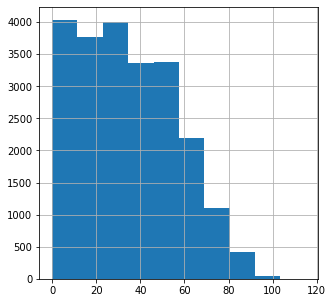

In [19]:
appt_no_show_df_yes['Age'].hist(figsize=(5,5));

In [20]:
appt_no_show_df_yes["Age"].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

Let's compare the mean age for no-shows=YES with the data from no-shows=NO

In [21]:
#remove any rows that contain age less than 0
appt_no_show_df_no = appt_no_show_df_no[appt_no_show_df_no["Age"] >= 0]
appt_no_show_df_no["Age"].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [22]:
'The mean Age for no-shows = YES is {0:.4f} while the mean Age for no-shows = NO is {1:.4f}'.format(appt_no_show_df_yes['Age'].mean(), appt_no_show_df_no['Age'].mean())

'The mean Age for no-shows = YES is 34.3177 while the mean Age for no-shows = NO is 37.7905'

Looks like younger patients tend to be no-shows

Let's create a boxplot and histogram of Age for both no-show options in one plot to see their distribution

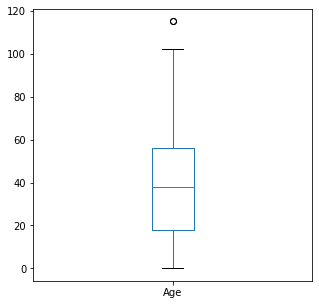

In [23]:
appt_no_show_df_no['Age'].plot(kind='box', figsize=(5,5));

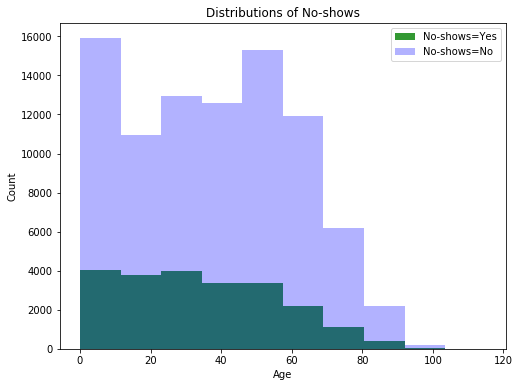

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(appt_no_show_df_yes['Age'], alpha=0.8, label="No-shows=Yes", color="green")
ax.hist(appt_no_show_df_no['Age'], alpha=0.3, label="No-shows=No", color="blue")
ax.set_title('Distributions of No-shows')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

ax.legend(loc='upper right')
plt.show()

From the above histogram of both datasets, it looks like there are somewhat similar distributions for age between both no-show options

Let's explore the Neighborhood column a bit

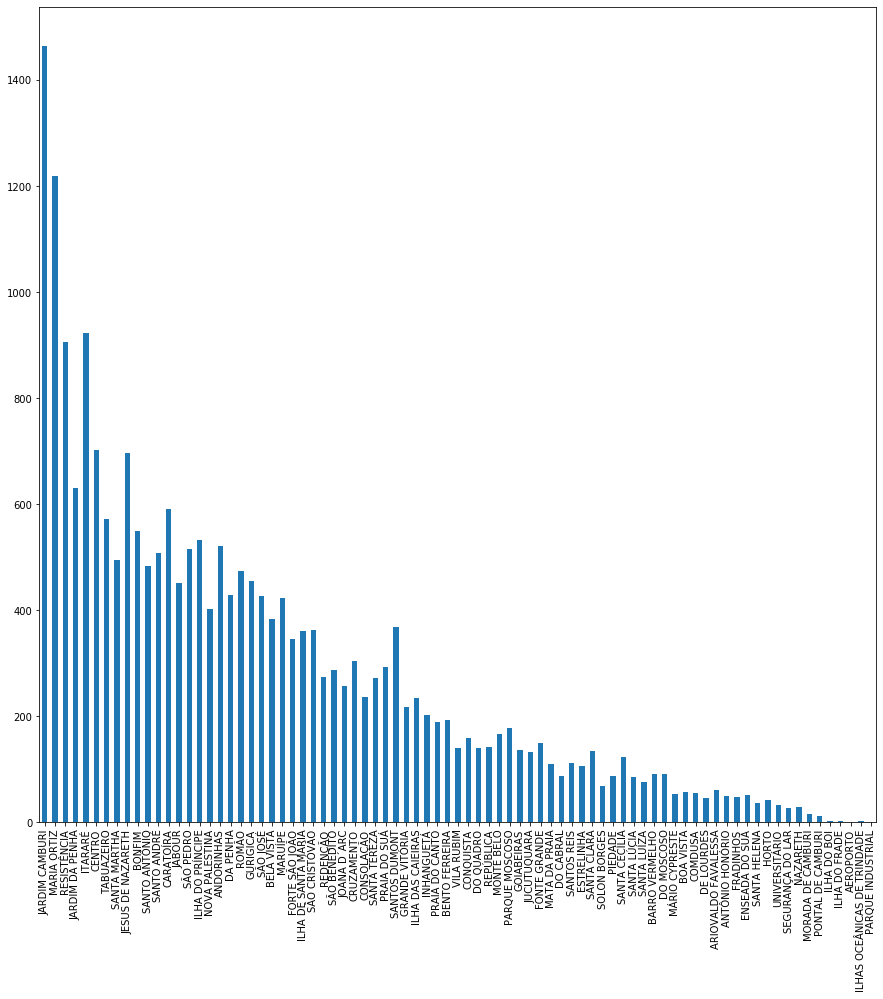

In [25]:
ind = appt_no_show_df['Neighbourhood'].value_counts().index
appt_no_show_df_yes['Neighbourhood'].value_counts()[ind].plot(kind='bar', figsize=(15,15));

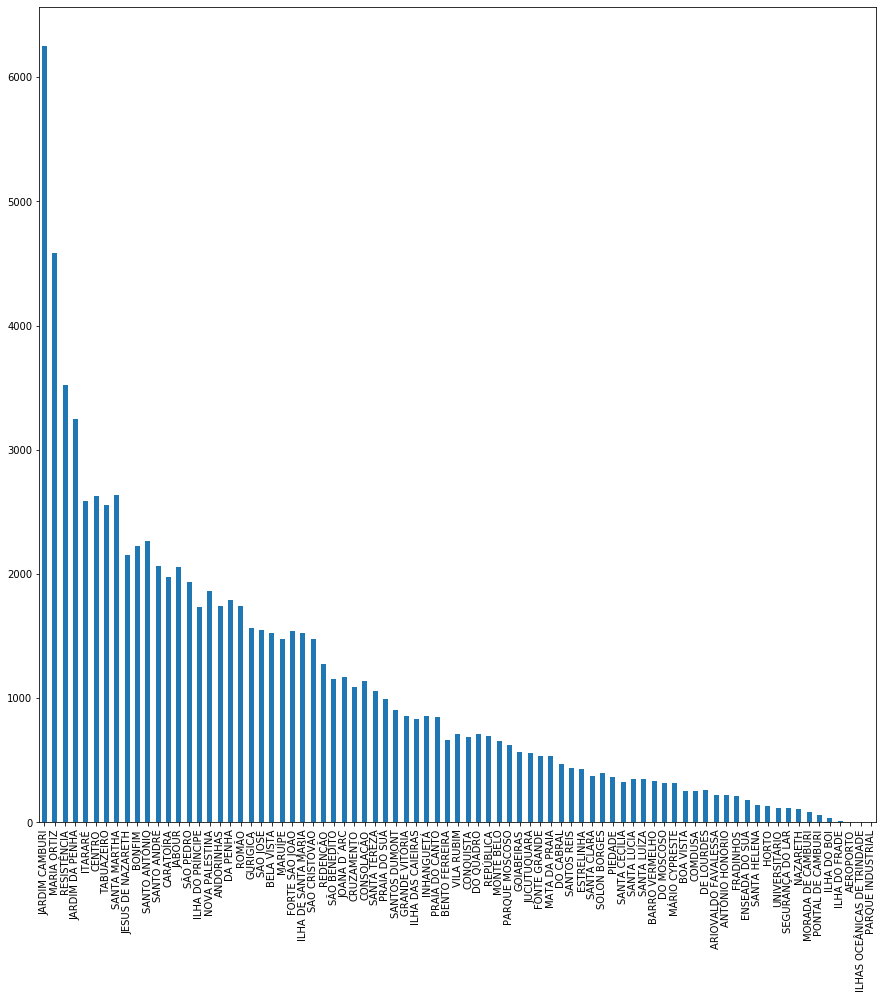

In [26]:
appt_no_show_df_no['Neighbourhood'].value_counts()[ind].plot(kind='bar', figsize=(15,15));

From the above, it looks like Neighborhood may not be a factor given that the distribution are very similar for both no-show options

Let's look at the correlation between all numerical features in the dataset

In [27]:
appt_no_show_df.corr()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,1.000000,0.004039,0.007890,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,-0.001461
AppointmentID,0.004039,1.000000,0.018496,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,-0.162602
Gender,0.007890,0.018496,1.000000,-0.106440,-0.114293,-0.055718,-0.032554,0.106167,0.022814,-0.046298,-0.004119
Age,-0.004139,-0.019126,-0.106440,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,-0.060319
Scholarship,-0.002880,0.022615,-0.114293,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135
Hipertension,-0.006441,0.012752,-0.055718,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701
Diabetes,0.001605,0.022628,-0.032554,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180
Alcoholism,0.011011,0.032944,0.106167,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196
Handcap,-0.007916,0.014106,0.022814,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076
SMS_received,-0.009749,-0.256618,-0.046298,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431


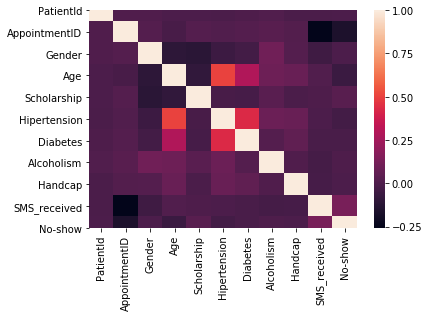

In [28]:
sns.heatmap(appt_no_show_df.corr());

Based on the above statistical tests, it seems to be that Handicap, Alcoholism, Diabetes, Hypertension, Scholarship and Age are some possible factors for predicting if a patient will show up to an appointment

### Question 2: Which gender and age group is most likely to become a no-show?

I will first group the no_shows=YES data by gender and then group by age groups to see how the data relates to the two no-show options <br>
NOTE:
MALE = 1
FEMALE = 0 


In [29]:
appt_no_show_df_yes_gender = appt_no_show_df_yes.groupby(['Gender'])

In [30]:
appt_no_show_df_yes_gender['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,14594.0,36.16219,21.184209,0.0,20.0,34.0,52.0,115.0
1,7725.0,30.83301,22.972200,0.0,10.0,28.0,49.0,97.0


Fom looking at the mean age between Males and Females, I can see that males who are no-shows tend to be younger than females who are no-shows <br>
I can also see that there are a lot more Females than Males in this dataset <br>
Let's dig in a bit further into the different ages by creating a histogram with bucket ranges

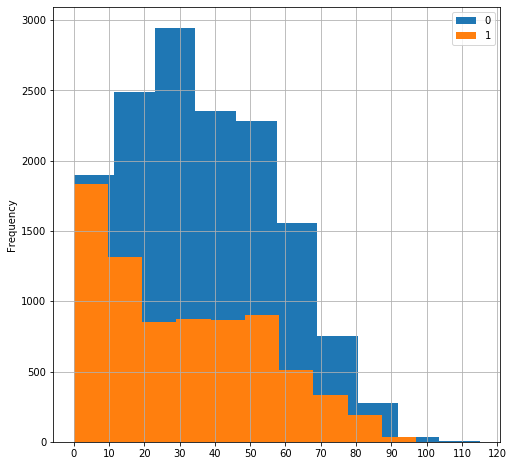

In [31]:
#appt_no_show_df_yes_gender.hist(by='Gender');
appt_no_show_df_yes_gender['Age'].plot(kind='hist', grid=True, bins=10, figsize=(8,8))
plt.legend();
plt.xticks(np.arange(0, 130, 10));

Based on the histogram above, I notice the following: <br> 
For Males(1), the age group most likely to be a no-show is between 0 and 9 years old <br>
For Females(0), the age groups most likely to be a no-show is between 22 and 34 years old 

<a id='conclusions'></a>
## Conclusions

After extracting the no-show data, cleaning the data, and exploring the data, here are some interesting points I found: <br>
Younger patients overall have a higher chance to be a no-show <br>
Between Male and Female patients, Females tend to have a higher chance of being a no-show <br>
For Males, the age group most likely to be a no-show seem to be between 0 and 9 years old <br>
For Females, the age group most likely to be a no-show seem to be between 22 and 34 years old <br>
According to the correlation stats and describe on the many columns, there may exist a relationship between no-shows and Handicap, Alcoholism, Diabetes, Hypertension, Scholarship and Age. <br><br>
One thing to note is that my results are tentative. To fully understand and/or confirm each observation mentioned above, I would need to take the data set and begin looking into possible algorithms that could be applied and understand which features may indeed have more importance.